<a href="https://colab.research.google.com/github/pincesslucy/mnist/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

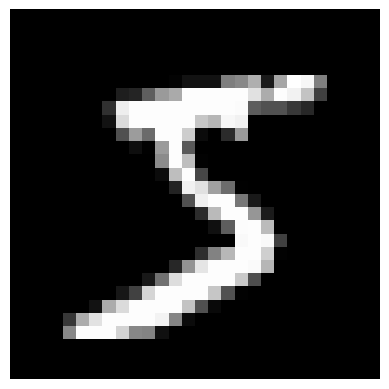

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

##기본NN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from keras.optimizers import Adam
from tensorflow import keras

In [ ]:
from keras.api._v2.keras import activations
input_ = keras.layers.Input(shape=[28,28])
flat = keras.layers.Flatten(input_shape=[28,28])(input_)
hidden1 = keras.layers.Dense(32, activation='relu')(flat)
hidden2 = keras.layers.Dense(32, activation='relu')(hidden1)
output = keras.layers.Dense(10, activation='softmax')(hidden2)
model = keras.Model(inputs=[input_], outputs=[output])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

In [ ]:
history = model.fit(x_train, y_train, batch_size=256, epochs=50000, validation_split=0.1, callbacks=[early_stopping_cb])

Epoch 1/50000
211/211 [==============================] - 2s 6ms/step - loss: 0.7481 - accuracy: 0.7805 - val_loss: 0.2719 - val_accuracy: 0.9223
Epoch 2/50000
211/211 [==============================] - 1s 4ms/step - loss: 0.2814 - accuracy: 0.9192 - val_loss: 0.1964 - val_accuracy: 0.9453
Epoch 3/50000
211/211 [==============================] - 1s 4ms/step - loss: 0.2195 - accuracy: 0.9359 - val_loss: 0.1692 - val_accuracy: 0.9527
Epoch 4/50000
211/211 [==============================] - 1s 4ms/step - loss: 0.1842 - accuracy: 0.9464 - val_loss: 0.1465 - val_accuracy: 0.9600
Epoch 5/50000
211/211 [==============================] - 1s 4ms/step - loss: 0.1593 - accuracy: 0.9535 - val_loss: 0.1326 - val_accuracy: 0.9648
Epoch 6/50000
211/211 [==============================] - 1s 4ms/step - loss: 0.1403 - accuracy: 0.9587 - val_loss: 0.1262 - val_accuracy: 0.9647
Epoch 7/50000
211/211 [==============================] - 1s 4ms/step - loss: 0.1257 - accuracy: 0.9632 - val_loss: 0.1174 - val_ac

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1062 - accuracy: 0.9669


[0.1062437891960144, 0.9668999910354614]

In [ ]:
from PIL import Image

# 이미지 파일 경로 지정
image_file = "/content/drive/MyDrive/Colab Notebooks/data/mnist/5_1.png"

# 이미지 불러오기
image = Image.open(image_file)

# 이미지 크기 변경 및 흑백 처리
image = image.convert('L').resize((28, 28))

# 이미지 데이터를 numpy 배열로 변환
image_array = np.array(image)

# 배열 크기를 [1, 28, 28]로 변환
image_array = image_array.reshape([1,28, 28])

# 결과 출력
print(image_array.shape)


(1, 28, 28)


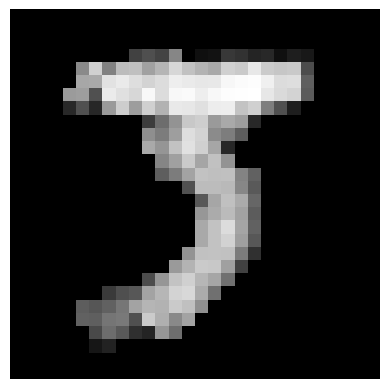

In [ ]:
plt.imshow(image_array[0], cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
image_sample = image_array/255.0

In [ ]:
y_pred = model.predict(image_sample)
pred_classes = np.argmax(y_pred, axis=1)
pred_classes

1/1 [==============================] - 0s 23ms/step


array([3])